# MA755 - Team Sandbox

Matrial adapted from Google's TensorFlow documentation.

Annotations, comments, and implementation on dataset by Angela Su, Tyler Miguel, Sebastian Bury

# Introduction

Deep learning is a domain within machine learning that is focused on building algorithms that resemble the structure of the brain. This structure is an Artificial Neural Network (ANN) and is the base of deep learning algorithms, in which they take an input, apply a function(s) and return an output (usually a prediction).

In this notebook we applied image recognition using a Convolutional Neural Network (CNN) to train a model to classify images of cats and dogs to ultimately predict the contents of an unseen image of a cat or dog. The application of a CNN is modeled after the structure of a visual cortex. The visual cortex contains a complex arrangement of cells that are sensitive to small sub-regions of the visual field, called a receptive field. The sub-regions are tiled to cover the entire visual field. These cells act as local filters over the input space and are well-suited to exploit the strong spatially local correlation present in natural images. Additionally, CNN are a form of multilayer perceptrons (MLP) which make them good algorithms to learn non-linear patterns.

A CNN takes a set of inputs in the input layer and transforms them within the hidden layers until it reaches the output layer. The hidden layers are responsiple for filtering the inputs to produce the strongest response to a spatially local input pattern. The receptive fields partially overlaps to create a visual field with a constant weight vector and bias which create a feature map. Each hidden layer is made up of many feature maps. 

The main layers in a CNN are the convolutional and pooling layers. The convolutional layer, in image recognition, contains neurons that are connected to the pixels in the repective field in the previous layer (now the whole image). This allows the the algorithm to concentrate on low-level features and pass them onto the next layer to be reconstructed into higher-level features. The pooling layers shrink the input image to reduce computation, memory, and number of parameters. 

Overall, the CNN takes an input, passes it to a convolutional layer, then an activation layer (typically ReLU), then a pooling layer. This process is repeated until the image reaches the end of the network where it enteres a feedforward network that is made up of fully connected layers and a final layer that outputs probabilities, in terms of the classification.  

We will walk through a simple example using Google's TensorFlow documentation and data from Kaggle's repository.

# Load Libraries 

Below are the libraries that we will use to build this algorithm.

In [4]:
from __future__ import division, print_function, absolute_import
from skimage import color, io
from scipy.misc import imresize
import numpy as np
import tensorflow as tf
from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib
from sklearn.model_selection import train_test_split
import os
from glob import glob
from IPython.display import Image 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Import Data

The data we will use can be can be downloaded on the [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) website. There you will find a training and test set. The training set has 25,000 images of cats and dogs that can be used to train the model. Given that this is a toy example for implementation, we will only use the training data to train and test the algorithm.

The image classification are denoted by begining of the image name. For cats, the image name starts with "cat..." and for dogs the image name starts with "dog...". To split our data and build our label data we will point to the file directory, extract the names of the files and split them into the objects `cat_files` and `dog_files`.

In [5]:
files_path = 'datasets/catsndogs/train/'

In [6]:
cat_files_path = os.path.join(files_path, 'cat.*.jpg')
dog_files_path = os.path.join(files_path, 'dog.*.jpg')

In [7]:
cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))

In [8]:
n_files = len(cat_files) + len(dog_files)
print(n_files)

25000


Printing `n_files` shows us that we have 25,000 images between our two objects.

# Take a look at the data

We can directly look at a image within our data. By using the `Image` function, and the file path, we can call the jpg image and print it to our notebook. Below is the first cat image in our dataset.

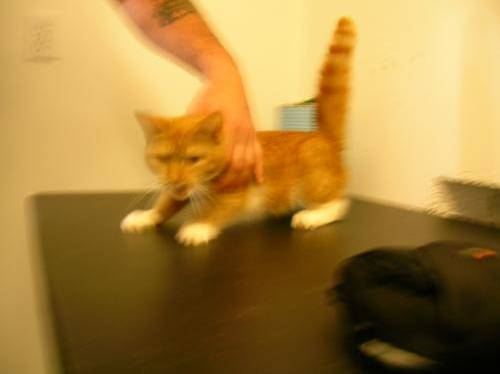

In [12]:
Image(filename=files_path+'/cat.0.jpg')

We can also see the first dog image in our dataset using the same method. As a reminder, all the images are located in the same directory.

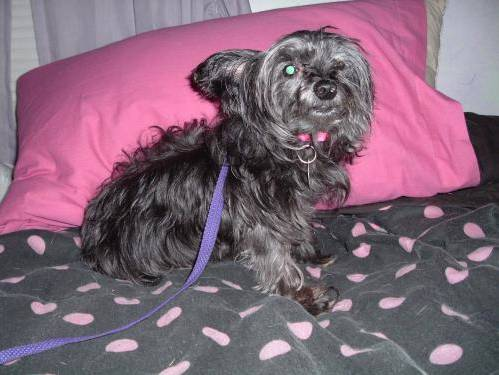

In [13]:
Image(filename=files_path+'/dog.0.jpg')

# Resize images

Our intial dataset has images of all sizes. This won't well for our network. We will first look to resize the images to 28x28 pixels. Given that our Additionally, we will extract build the label data `ally` by counting the images in `cat_files`. We will do the same for the images in `dog_files` too. Additionally, we will be using 3 color channels for these images.

Before doing this, we will intialize our variables `allX` and `ally` to prepare to take on the new values.

In [15]:
size_image = 28

allX = np.zeros((n_files, size_image, size_image, 3), dtype='float32')
ally = np.zeros(n_files, dtype='int32')
count = 0
for f in cat_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 0
        count += 1
    except:
        continue

In [21]:
for f in dog_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 1
        count += 1
    except:
        continue

# Convolution layer

As we mentioned earlier, the CNN will take an input (image) and pass it to a convolution layer which uses receptive fields to scan over the image and create several feature maps. Before passing the image through to the convolution layer we will take a look at the dimensions of the image.

In [22]:
np.array(allX[0:2], dtype=np.float32).shape

(2, 28, 28, 3)

We can see there are 4 dimensions. This is a 4D tensor that represents [number of images, pixel length, pixel width, color channels]. We can see that our images have 28x28 pixel size. We will only use the first two images and break up the tuple below to extract the information that we will use to construct our first convolution layer. Then we will create a two filters using a vertical and horizontal line.

In [24]:
data_point = np.array(allX[0:2], dtype=np.float32)
batch_size, height, width, channels = (data_point.shape)

In [40]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) 
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

Now that we have our filter, we will build the compute graph that will compute the convolutional layer and print out the results.

In [42]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: data_point})

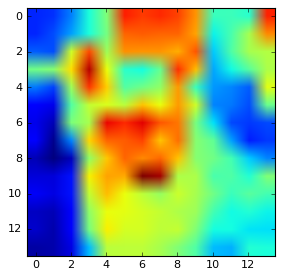

In [56]:
plt.imshow(output[1, :, :, 0])
plt.show()

We can see the reults of the convolutional layer. The image above is the first feature map of the second image. We can compare this image with the input image below. We can sort of see the resemblance.

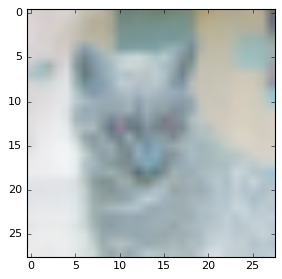

In [35]:
plt.imshow(allX[1])
plt.show()

Below is the original image given in our training dataset.

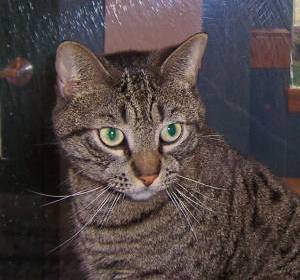

In [38]:
Image(filename=files_path+'/cat.1.jpg')

# Pooling layer

Similiar to the convolution layer, we will construct a pooling layer. In this example, the CNN will take an input (image) and pass it to a pooling layer. This sub-sampled pooling layer will ultimately shrink the image's to make it more manageable in our network. The `max_pool` function means that only the maximum value within the sub-sample will make it to the next layer. This helps to condense our image.

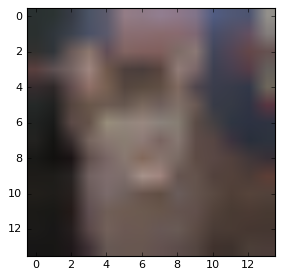

In [60]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: data_point})

plt.imshow(output[1].astype(np.uint8)) 
plt.show()

We can see that the image closely resmbles the original image.

# Split the data

In [21]:
from tensorflow.contrib.layers import fully_connected

In [51]:
X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.1, random_state=42)

In [ ]:
# from google https://www.tensorflow.org/tutorials/layers

In [52]:
tf.reset_default_graph()

def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features, [-1, 28, 28, 3])
    
    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == learn.ModeKeys.TRAIN)
    
    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=2)
    
    loss = None
    train_op = None
    
    # Calculate Loss (for both TRAIN and EVAL modes)
    if mode != learn.ModeKeys.INFER:
        onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=2)
        loss = tf.losses.softmax_cross_entropy(
            onehot_labels=onehot_labels, logits=logits)
        
    # Configure the Training Op (for TRAIN mode)
    if mode == learn.ModeKeys.TRAIN:
        train_op = tf.contrib.layers.optimize_loss(
            loss=loss,
            global_step=tf.contrib.framework.get_global_step(),
            learning_rate=0.001,
            optimizer="SGD")

    # Generate Predictions
    predictions = {
        "classes": tf.argmax(
            input=logits, axis=1),
        "probabilities": tf.nn.softmax(
            logits, name="softmax_tensor")
    }
    # Return a ModelFnOps object
    return model_fn_lib.ModelFnOps(
        mode=mode, predictions=predictions, loss=loss, train_op=train_op)

In [53]:
cd_classifier = learn.Estimator(
      model_fn=cnn_model_fn, model_dir="tempformodel_1/")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_evaluation_master': '', '_tf_random_seed': None, '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_model_dir': None, '_is_chief': True, '_master': '', '_keep_checkpoint_max': 5, '_environment': 'local', '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13df682b0>, '_num_worker_replicas': 0}


In [54]:
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

In [55]:
cd_classifier.fit(
    x=X,
    y=Y,
    batch_size=10,
    steps=1000,
    monitors=[logging_hook])

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/tylermiguel/anaconda/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into tempformodel_1/model.ckpt.
INFO:tensorflow:loss = 33.5035, step = 1
INFO:tensorflow:probabilities = [[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.99999046  0.00000956]
 [ 0.          1.        ]]
INFO:tensorflow:probabilities = [[ 0.57345474  0.42654532]
 [ 0.68973547  0.31026453]
 [ 0.42418012  0.57581985]
 [ 0.43271071  0.56728929]
 [ 0.53158331  0.46841663]
 [ 0.49066937  0.50933069]
 [ 0.47090369  0.52909631]
 [ 0.34442443  0.65557557]
 [ 0.44369242  0.55630755]
 [ 0.74543875  0.25456125]] (3.791 sec)
INFO:tensorflow:global_step/sec: 13.7665
INFO:tensorflow:loss = 0.548433, step = 101 (7.265 sec)
INFO:tensorflow:probabilities = [[ 0.56656802  0.43343195]
 [ 0.40188652  0.59811348]
 [ 0.56283218  0.43716779]
 [ 0.85340321 

Estimator(params=None)

In [24]:
cd_classifier.

<bound method _BaseEstimator.get_params of Estimator(params=None)>

In [25]:
metrics = {
    "accuracy":
        learn.MetricSpec(
            metric_fn=tf.metrics.accuracy, prediction_key="classes"),
}

In [26]:
eval_results = cd_classifier.evaluate(
    x=X_test, y=Y_test, metrics=metrics)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/tylermiguel/anaconda/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-05-10-20:47:18
INFO:tensorflow:Restoring parameters from tempformodel/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-05-10-20:47:25
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.5636, global_step = 1000, loss = 0.68078
{'loss': 0.68077993, 'global_step': 1000, 'accuracy': 0.5636}


In [27]:
print(eval_results)

{'loss': 0.68077993, 'global_step': 1000, 'accuracy': 0.5636}


In [ ]:
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

In [70]:
predictions = cd_classifier.predict(X_test, as_iterable=True)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/tylermiguel/anaconda/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Restoring parameters from tempformodel_1/model.ckpt-1000


In [73]:
for i, p in enumerate(predictions):
  print("Prediction %s: Class %s Probability %s" % (i + 1, p["classes"], p["probabilities"]))

Prediction 1: Class 0 Probability [ 0.62251306  0.37748694]
Prediction 2: Class 0 Probability [ 0.55736297  0.44263709]
Prediction 3: Class 0 Probability [ 0.91667616  0.08332388]
Prediction 4: Class 0 Probability [ 0.89033675  0.10966321]
Prediction 5: Class 1 Probability [ 0.42585069  0.57414931]
Prediction 6: Class 1 Probability [ 0.49717304  0.50282699]
Prediction 7: Class 1 Probability [ 0.48388466  0.51611537]
Prediction 8: Class 1 Probability [ 0.49309069  0.50690931]
Prediction 9: Class 1 Probability [ 0.4909493   0.50905073]
Prediction 10: Class 0 Probability [ 0.52315986  0.47684017]
Prediction 11: Class 0 Probability [ 0.66166425  0.33833572]
Prediction 12: Class 1 Probability [ 0.48317069  0.51682925]
Prediction 13: Class 1 Probability [ 0.49717304  0.50282699]
Prediction 14: Class 1 Probability [ 0.49717304  0.50282699]
Prediction 15: Class 0 Probability [ 0.50607538  0.49392459]
Prediction 16: Class 1 Probability [ 0.47798628  0.52201372]
Prediction 17: Class 1 Probabilit

# Conclusion